In [5]:
import os
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline
plt.style.use('seaborn')

### Load the data 

In [6]:
path = '../Entrenamientos/result_tramos.xlsx'

In [7]:
df = pd.read_excel(path)

In [8]:
df = df[df["sp_vel_aparente"]!=-np.inf]

In [9]:
df.columns = ['tramo', 'tramo_inicial', 'tramo_final', 'pwr', 'tiempo_tramo', 'distancia_tramo', 'spd', 'viento_aparente', 'porc']

In [10]:
df.columns

Index(['tramo', 'tramo_inicial', 'tramo_final', 'pwr', 'tiempo_tramo',
       'distancia_tramo', 'spd', 'viento_aparente', 'porc'],
      dtype='object')

In [11]:
df.head(5)

,tramo,tramo_inicial,tramo_final,pwr,tiempo_tramo,distancia_tramo,spd,viento_aparente,porc
0,0,0,65,77.836186,106,966.000000,32.807547,8.396543,-3.377386
1,1,65,432,255.381555,980,4819.000000,17.702449,5.337415,4.181100
2,2,432,468,152.194252,44,473.935824,38.776567,8.311220,-1.737873
3,3,468,532,248.770434,120,813.223602,24.396708,8.704791,2.662585
4,4,532,548,155.753257,21,206.720563,35.437811,8.487546,-0.873144


In [12]:
#Por aqui

In [13]:
simple = df[['pwr','spd','porc','viento_aparente']]

In [14]:
simple_pca = df[['x_tsne','y_tsne','z_tsne']]

KeyError: "['x_tsne' 'y_tsne' 'z_tsne'] not in index"

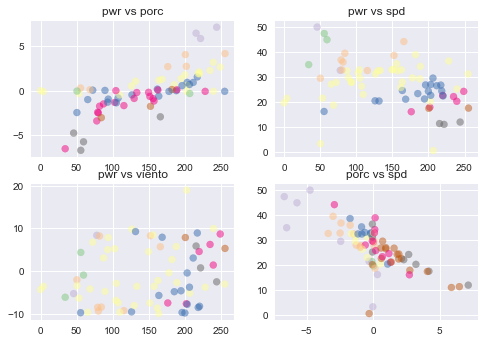

In [15]:
plt.subplot(221)
plt.scatter(x=simple['pwr'],y=simple['porc'], alpha=0.5,c=simple['spd'],cmap='Accent')
plt.title('pwr vs porc')
plt.grid(True)

plt.subplot(222)
plt.scatter(x=simple['pwr'],y=simple['spd'], alpha=0.5,c=simple['porc'],cmap='Accent')
plt.title('pwr vs spd')
plt.grid(True)

plt.subplot(223)
plt.scatter(x=simple['pwr'],y=simple['viento_aparente'], alpha=0.5,c=simple['porc'],cmap='Accent')
plt.title('pwr vs viento')
plt.grid(True)

plt.subplot(224)
plt.scatter(x=simple['porc'],y=simple['spd'], alpha=0.5,c=simple['pwr'],cmap='Accent')
plt.title('porc vs spd')
plt.grid(True)

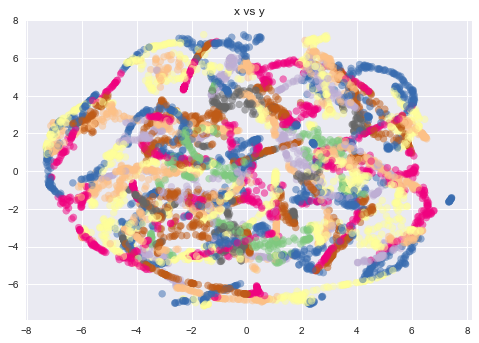

In [21]:

plt.scatter(x=simple_pca['x_tsne'],y=simple_pca['y_tsne'], alpha=0.5,c=simple_pca['z_tsne'],cmap='Accent')
plt.title('x vs y')
plt.show()

In [16]:
from sklearn.cluster import KMeans

In [17]:
kmeans = KMeans(n_clusters=5)

In [18]:
kmeans.fit(simple)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [19]:
clust = kmeans.predict(simple)

In [20]:
simple['k-means']=clust

C:\Users\eduardo.hernanz\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [21]:
simple.columns

Index(['pwr', 'spd', 'porc', 'viento_aparente', 'k-means'], dtype='object')

In [22]:
simple.head(10)

,pwr,spd,porc,viento_aparente,k-means
0,77.836186,32.807547,-3.377386,8.396543,0
1,255.381555,17.702449,4.181100,5.337415,4
2,152.194252,38.776567,-1.737873,8.311220,3
3,248.770434,24.396708,2.662585,8.704791,4
4,155.753257,35.437811,-0.873144,8.487546,3
5,217.073745,26.917836,1.566720,8.945233,4
6,81.670731,36.101408,-1.730661,8.230976,0
7,219.577239,22.792053,2.126107,4.616644,4
8,87.147009,32.620000,-1.471857,3.116946,0
9,202.978559,27.138462,0.946517,-0.390809,1


In [23]:
simple.groupby('k-means').count()

,pwr,spd,porc,viento_aparente
k-means,,,,
0,17,17,17,17
1,17,17,17,17
2,11,11,11,11
3,16,16,16,16
4,14,14,14,14


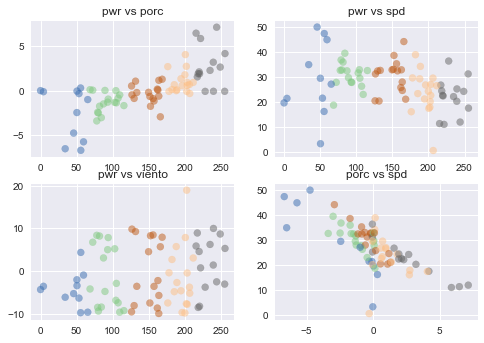

In [24]:
plt.subplot(221)
plt.scatter(x=simple['pwr'],y=simple['porc'], alpha=0.5,c=simple['k-means'],cmap='Accent')
plt.title('pwr vs porc')
plt.grid(True)

plt.subplot(222)
plt.scatter(x=simple['pwr'],y=simple['spd'], alpha=0.5,c=simple['k-means'],cmap='Accent')
plt.title('pwr vs spd')
plt.grid(True)

plt.subplot(223)
plt.scatter(x=simple['pwr'],y=simple['viento_aparente'], alpha=0.5,c=simple['k-means'],cmap='Accent')
plt.title('pwr vs viento')
plt.grid(True)

plt.subplot(224)
plt.scatter(x=simple['porc'],y=simple['spd'], alpha=0.5,c=simple['k-means'],cmap='Accent')
plt.title('porc vs spd')
plt.grid(True)

In [25]:
from sklearn import mixture

In [26]:
model2 = mixture.GaussianMixture(n_components=5)

In [27]:
model2.fit(simple[['pwr', 'spd', 'porc', 'viento_aparente']])

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=5, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [28]:
model2.predict(simple[['pwr', 'spd', 'porc', 'viento_aparente']])

array([2, 3, 1, 3, 1, 1, 2, 3, 2, 1, 0, 1, 0, 0, 0, 1, 2, 1, 1, 3, 1, 3, 0,
       4, 2, 2, 3, 1, 4, 2, 2, 4, 0, 3, 1, 3, 0, 0, 0, 2, 1, 1, 2, 2, 1, 2,
       1, 2, 1, 4, 1, 1, 2, 1, 1, 3, 0, 1, 1, 1, 1, 0, 1, 2, 2, 2, 1, 2, 1,
       0, 1, 1, 1, 1, 1], dtype=int64)

In [29]:
simple['gaussian'] = model2.predict(simple[['pwr', 'spd', 'porc', 'viento_aparente']])

C:\Users\eduardo.hernanz\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [30]:
simple.columns

Index(['pwr', 'spd', 'porc', 'viento_aparente', 'k-means', 'gaussian'], dtype='object')

In [31]:
simple.head(10)

,pwr,spd,porc,viento_aparente,k-means,gaussian
0,77.836186,32.807547,-3.377386,8.396543,0,2
1,255.381555,17.702449,4.181100,5.337415,4,3
2,152.194252,38.776567,-1.737873,8.311220,3,1
3,248.770434,24.396708,2.662585,8.704791,4,3
4,155.753257,35.437811,-0.873144,8.487546,3,1
5,217.073745,26.917836,1.566720,8.945233,4,1
6,81.670731,36.101408,-1.730661,8.230976,0,2
7,219.577239,22.792053,2.126107,4.616644,4,3
8,87.147009,32.620000,-1.471857,3.116946,0,2
9,202.978559,27.138462,0.946517,-0.390809,1,1


In [32]:
simple.groupby('gaussian').count()

,pwr,spd,porc,viento_aparente,k-means
gaussian,,,,,
0,12,12,12,12,12
1,32,32,32,32,32
2,18,18,18,18,18
3,9,9,9,9,9
4,4,4,4,4,4


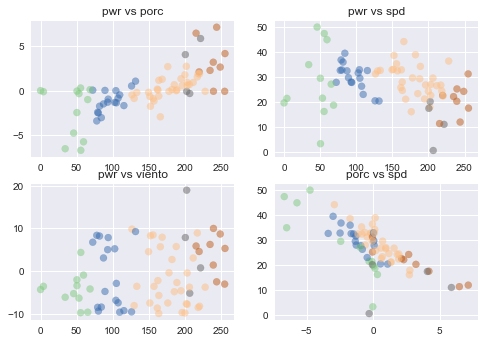

In [33]:
plt.subplot(221)
plt.scatter(x=simple['pwr'],y=simple['porc'], alpha=0.5,c=simple['gaussian'],cmap='Accent')
plt.title('pwr vs porc')
plt.grid(True)

plt.subplot(222)
plt.scatter(x=simple['pwr'],y=simple['spd'], alpha=0.5,c=simple['gaussian'],cmap='Accent')
plt.title('pwr vs spd')
plt.grid(True)

plt.subplot(223)
plt.scatter(x=simple['pwr'],y=simple['viento_aparente'], alpha=0.5,c=simple['gaussian'],cmap='Accent')
plt.title('pwr vs viento')
plt.grid(True)

plt.subplot(224)
plt.scatter(x=simple['porc'],y=simple['spd'], alpha=0.5,c=simple['gaussian'],cmap='Accent')
plt.title('porc vs spd')
plt.grid(True)

In [ ]:
#LO MISMO CON LAS VARIABLESQ QUE SALIERON DEL PCA

In [42]:
kmeans_pca = KMeans(n_clusters=5)

In [43]:
kmeans_pca.fit(simple_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [44]:
clust_pca = kmeans_pca.predict(simple_pca)

In [45]:
simple_pca['k-means']=clust_pca

C:\Users\David\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [46]:
simple_pca.columns

Index(['x_tsne', 'y_tsne', 'z_tsne', 'k-means'], dtype='object')

In [47]:
simple_pca.head(10)

,x_tsne,y_tsne,z_tsne,k-means
0,-1.687773,6.267898,3.898278,4
1,3.334101,-3.127026,5.262300,2
2,-1.728607,6.219493,3.933778,4
3,3.341562,-3.145879,5.253956,2
4,-0.324282,-1.608544,4.862890,2
5,-1.738453,6.172400,3.862551,4
6,-0.389241,-1.526303,4.860177,2
7,-1.911752,5.726861,3.478523,4
8,-1.922578,5.693539,3.446318,4
9,-0.426759,-1.605777,4.828764,2


In [48]:
simple_pca.groupby('k-means').count()

,x_tsne,y_tsne,z_tsne
k-means,,,
0,1529,1529,1529
1,1328,1328,1328
2,1694,1694,1694
3,1383,1383,1383
4,1652,1652,1652


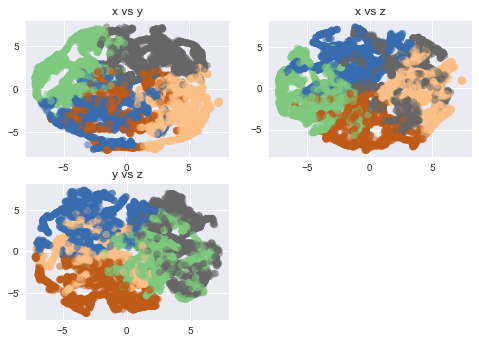

In [49]:
plt.subplot(221)
plt.scatter(x=simple_pca['x_tsne'],y=simple_pca['y_tsne'], alpha=0.5,c=simple_pca['k-means'],cmap='Accent')
plt.title('x vs y')
plt.grid(True)

plt.subplot(222)
plt.scatter(x=simple_pca['x_tsne'],y=simple_pca['z_tsne'], alpha=0.5,c=simple_pca['k-means'],cmap='Accent')
plt.title('x vs z')
plt.grid(True)

plt.subplot(223)
plt.scatter(x=simple_pca['y_tsne'],y=simple_pca['z_tsne'], alpha=0.5,c=simple_pca['k-means'],cmap='Accent')
plt.title('y vs z')
plt.grid(True)

In [50]:
model2_pca = mixture.GaussianMixture(n_components=5)

In [52]:
model2_pca.fit(simple_pca[['x_tsne', 'y_tsne', 'z_tsne']])

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=5, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [53]:
model2_pca.predict(simple_pca[['x_tsne', 'y_tsne', 'z_tsne']])

array([1, 2, 1, ..., 2, 4, 1], dtype=int64)

In [54]:
simple_pca['gaussian'] = model2_pca.predict(simple_pca[['x_tsne', 'y_tsne', 'z_tsne']])

C:\Users\David\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [56]:
simple_pca.columns

Index(['x_tsne', 'y_tsne', 'z_tsne', 'k-means', 'gaussian'], dtype='object')

In [57]:
simple_pca.head(10)

,x_tsne,y_tsne,z_tsne,k-means,gaussian
0,-1.687773,6.267898,3.898278,4,1
1,3.334101,-3.127026,5.262300,2,2
2,-1.728607,6.219493,3.933778,4,1
3,3.341562,-3.145879,5.253956,2,2
4,-0.324282,-1.608544,4.862890,2,3
5,-1.738453,6.172400,3.862551,4,1
6,-0.389241,-1.526303,4.860177,2,3
7,-1.911752,5.726861,3.478523,4,1
8,-1.922578,5.693539,3.446318,4,1
9,-0.426759,-1.605777,4.828764,2,3


In [58]:
simple_pca.groupby('gaussian').count()

,x_tsne,y_tsne,z_tsne,k-means
gaussian,,,,
0,1754,1754,1754,1754
1,1633,1633,1633,1633
2,1328,1328,1328,1328
3,1759,1759,1759,1759
4,1112,1112,1112,1112


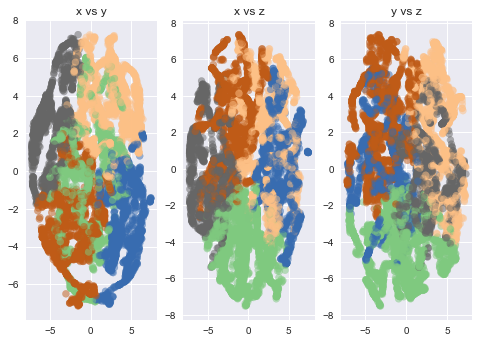

In [65]:
plt.subplot(131)
plt.scatter(x=simple_pca['x_tsne'],y=simple_pca['y_tsne'], alpha=0.5,c=simple_pca['gaussian'],cmap='Accent')
plt.title('x vs y')
plt.grid(True)

plt.subplot(132)
plt.scatter(x=simple_pca['x_tsne'],y=simple_pca['z_tsne'], alpha=0.5,c=simple_pca['gaussian'],cmap='Accent')
plt.title('x vs z')
plt.grid(True)

plt.subplot(133)
plt.scatter(x=simple_pca['y_tsne'],y=simple_pca['z_tsne'], alpha=0.5,c=simple_pca['gaussian'],cmap='Accent')
plt.title('y vs z')
plt.grid(True)

In [61]:
simple.to_csv('20180406_LEVS_195_90_R_E_ml_pca_clust.csv')